Enter x[0]: 0
Enter x[1]: 0


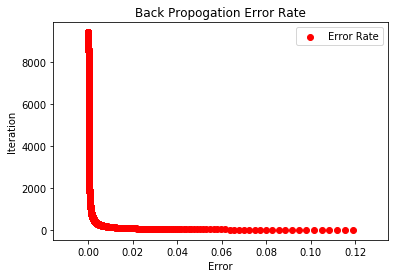

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

class BPA(object):  
    
    def sumFunction( self ,w, x ):
        sum_ = np.inner(w , x)
        return sum_
    
    def sigmoid(self , inp):
        return 1/(1 + math.exp(-inp))
    
    def error(self, Expected, Actual):
        firstDer = Actual * ( 1 - Actual )
        return (Expected - Actual)*firstDer
    
    def errorLocal(self, Actual, err, W):
        firstDer = Actual * ( 1 - Actual )
        return err*firstDer*W
        
    def calculateCorrection(self, error, W):
        learningRate = 0.25
        return learningRate*error*W
    
    def updatedWeights(self, x, z, w, w1, w2, del1, del12, del22 ):
        for i in range(3):
            for j in range(3):
                if i == 0:
                    w[j] = w[j] + self.calculateCorrection(del1, z[j] )
                elif i == 1:
                    w1[j] = w1[j] + self.calculateCorrection(del12, x[j])
                else:
                    w2[j] = w2[j] + self.calculateCorrection(del22, x[j])  
                    
                    
    def plot(self, x, y ):
        plt.scatter( x, y, label = 'Error Rate',color = 'r')
        plt.xlabel('Error')
        plt.ylabel('Iteration')
        plt.title('Back Propogation Error Rate')
        plt.legend()
        plt.show()
        
    # Printing Values
    def printValues(self , i, del1, w, w1, w2):
        print('\nIterattion\t:\t' , i + 1)
        print('Error\t\t:\t' , del1)
        print('Weights\t\t:\t' , w)
        print('Weights 1\t:\t' , w1)
        print('Weights 2\t:\t' , w2)
        
        
    def iteration(self, x, w, w1, w2):
        i = 0
        del1 = 1
        # Storing in List for Ploting Graph
        errorList = []
        iterationList = []

        while del1 != 0:
            sumValueZin1 = self.sumFunction(w1 , x)
            z1 = self.sigmoid(sumValueZin1)

            sumValueZin2 = self.sumFunction(w2 , x)
            z2 = self.sigmoid(sumValueZin2)
            z = [ z1 , z2 , 1]
            sumValueYout = self.sumFunction(w , z )
            y = self.sigmoid(sumValueYout)
            # Error 
            del1 = self.error(1, y)
            
            #Appending Error and Iteration Number
            errorList.append(del1)
            iterationList.append(i + 1)
            
            # Local Error
            del12 = self.errorLocal(z1, del1,  w[0])
            del22 = self.errorLocal(z2, del1, w[1])
    
            #Corrected Weights
            self.updatedWeights(x, z, w, w1, w2, del1, del12, del22 )
            
            # For printing values in each iteration
            
            #self.printValues(i, del1, w, w1, w2)
    
            temp = del1*100000 # Till Two decimal Places
            if int(temp) > 0  and int(temp) < 10:
                #Ploting the Error with Iteration
                self.plot(errorList, iterationList)
                break
            i = i + 1

# Main Function
def main():
    x = [ 0, 1, 1 ]
    x[0] = int(input("Enter x[0]: "))
    x[1] = int(input("Enter x[1]: "))
    w = [0.4, 0.1, -0.2]
    w1 = [0.6, -0.1, 0.3]
    w2 = [-0.3, 0.4, 0.5]
    obj = BPA()
    obj.iteration(x, w, w1, w2)
    
if __name__ == "__main__":
    main() 